<a href="https://colab.research.google.com/github/Thiago1alberto/Thiago1alberto/blob/main/Face_Emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports padrão
import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
# Imports do TensorFlow
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import to_categorical

In [ ]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminhos das pastas
data_path = "/content/drive/MyDrive/TCC/FER_2013"
train_dir = os.path.join(data_path, "train")
test_dir = os.path.join(data_path, "test")

# Mapear emoções para rótulos numéricos e vice-versa
emotion_to_label = {'fear': 0, 'angry': 1, 'disgust': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
label_to_emotion = {v: k for k, v in emotion_to_label.items()}

# Carregar o DataFrame df_pixels
dataframe_pixels_path = os.path.join(data_path, 'dataframe_pixels.json')
df_pixels = pd.read_json(dataframe_pixels_path, lines=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_pixels.head()

,label,pixels,conjunto
0,0,"[[254, 177, 109, 102, 83, 80, 101, 134, 157, 1...",treino
1,0,"[[46, 55, 50, 38, 25, 30, 44, 56, 69, 103, 129...",treino
2,0,"[[171, 133, 89, 63, 99, 100, 91, 105, 99, 95, ...",treino
3,0,"[[88, 88, 88, 89, 89, 89, 87, 84, 81, 69, 41, ...",treino
4,0,"[[136, 121, 93, 115, 119, 122, 139, 131, 78, 1...",treino


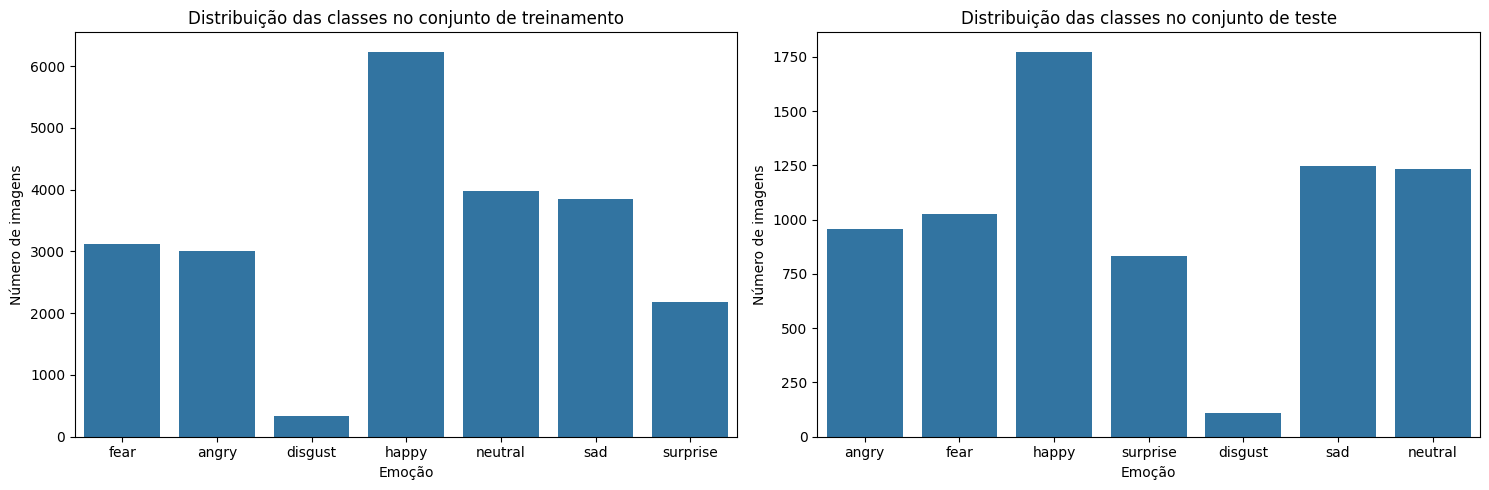

In [ ]:
# Função para contar o número de imagens por emoção em um diretório
def count_emotions(directory):
    emotion_counts = {}
    for emotion in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, emotion)):
            # Contar apenas se for um diretório
            emotion_counts[emotion] = len(os.listdir(os.path.join(directory, emotion)))
    return emotion_counts

# Contagem de emoções nos conjuntos de treinamento e teste
train_class_counts = count_emotions(train_dir)
test_class_counts = count_emotions(test_dir)

# Visualizar a distribuição das classes
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=list(train_class_counts.keys()), y=list(train_class_counts.values()))
plt.title('Distribuição das classes no conjunto de treinamento')
plt.xlabel('Emoção')
plt.ylabel('Número de imagens')

plt.subplot(1, 2, 2)
sns.barplot(x=list(test_class_counts.keys()), y=list(test_class_counts.values()))
plt.title('Distribuição das classes no conjunto de teste')
plt.xlabel('Emoção')
plt.ylabel('Número de imagens')

plt.tight_layout()
plt.show()

In [ ]:
# Função para contar o número de imagens por emoção em um diretório
def count_emotions(directory):
    emotion_counts = {label: 0 for label in label_to_emotion.keys()}
    for label, emotion in label_to_emotion.items():
        if os.path.isdir(os.path.join(directory, emotion)):
            # Contar apenas se for um diretório
            emotion_counts[label] = len(os.listdir(os.path.join(directory, emotion)))
    return emotion_counts

# Contagem de emoções nos conjuntos de treinamento e teste
train_class_counts = count_emotions(train_dir)
test_class_counts = count_emotions(test_dir)

# Imprimir a contagem de imagens por emoção nos conjuntos de treinamento e teste
print("Contagem de imagens por emoção no conjunto de treinamento:")
for label, count in train_class_counts.items():
    print(f"{label}: {count}")

print("\nContagem de imagens por emoção no conjunto de teste:")
for label, count in test_class_counts.items():
    print(f"{label}: {count}")

Contagem de imagens por emoção no conjunto de treinamento:
0: 3117
1: 3008
2: 339
3: 6237
4: 3978
5: 3843
6: 2184

Contagem de imagens por emoção no conjunto de teste:
0: 1024
1: 958
2: 111
3: 1774
4: 1233
5: 1247
6: 831


In [ ]:
""" def get_image_data(directory, dataset_type):
    # Lista para armazenar os dados das imagens
    image_data = []

    # Iterar sobre cada emoção e diretório de imagem dentro do diretório fornecido
    for label, emotion in label_to_emotion.items():
        emotion_dir = os.path.join(directory, emotion)
        if os.path.isdir(emotion_dir):
            # Se o diretório da emoção existir
            for filename in os.listdir(emotion_dir):
                # Iterar sobre cada arquivo de imagem na pasta de emoção
                with open(os.path.join(emotion_dir, filename), 'rb') as file:
                    # Ler o conteúdo binário da imagem
                    image_bytes = file.read()
                    # Abre a imagem usando a PIL (Python Imaging Library)
                    image = Image.open(io.BytesIO(image_bytes))
                    # Converte a imagem para escala de cinza (se necessário) | já está em cinza
                    if image.mode != 'L':
                        image = image.convert('L')
                    # Obtem os pixels da imagem como uma matriz numpy
                    pixels = np.array(image)
                    # Adiciona os dados da imagem à lista de dados
                    image_data.append({'label': label, 'pixels': pixels, 'conjunto': dataset_type})

    return image_data

# pega os dados das imagens de treinamento e teste
train_image_data = get_image_data(train_dir, 'treino')
test_image_data = get_image_data(test_dir, 'teste')

# Converte os dados para DataFrame
train_df = pd.DataFrame(train_image_data)
test_df = pd.DataFrame(test_image_data)

# Concatena os DataFrames de treinamento e teste
image_data_df = pd.concat([train_df, test_df])

# Imprime o DataFrame
print(image_data_df) """


      label                                             pixels conjunto
0         0  [[252, 255, 231, 81, 17, 17, 17, 15, 15, 15, 1...   treino
1         0  [[230, 225, 220, 219, 220, 234, 229, 217, 209,...   treino
2         0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   treino
3         0  [[180, 118, 120, 130, 130, 106, 89, 50, 59, 68...   treino
4         0  [[66, 56, 25, 20, 20, 46, 80, 113, 140, 143, 1...   treino
...     ...                                                ...      ...
7173      6  [[252, 252, 253, 250, 255, 216, 136, 116, 140,...    teste
7174      6  [[98, 100, 100, 99, 97, 97, 98, 99, 97, 100, 9...    teste
7175      6  [[112, 116, 95, 99, 122, 123, 112, 99, 106, 13...    teste
7176      6  [[91, 144, 232, 199, 197, 204, 176, 214, 216, ...    teste
7177      6  [[183, 172, 171, 177, 181, 187, 192, 190, 192,...    teste

[29884 rows x 3 columns]


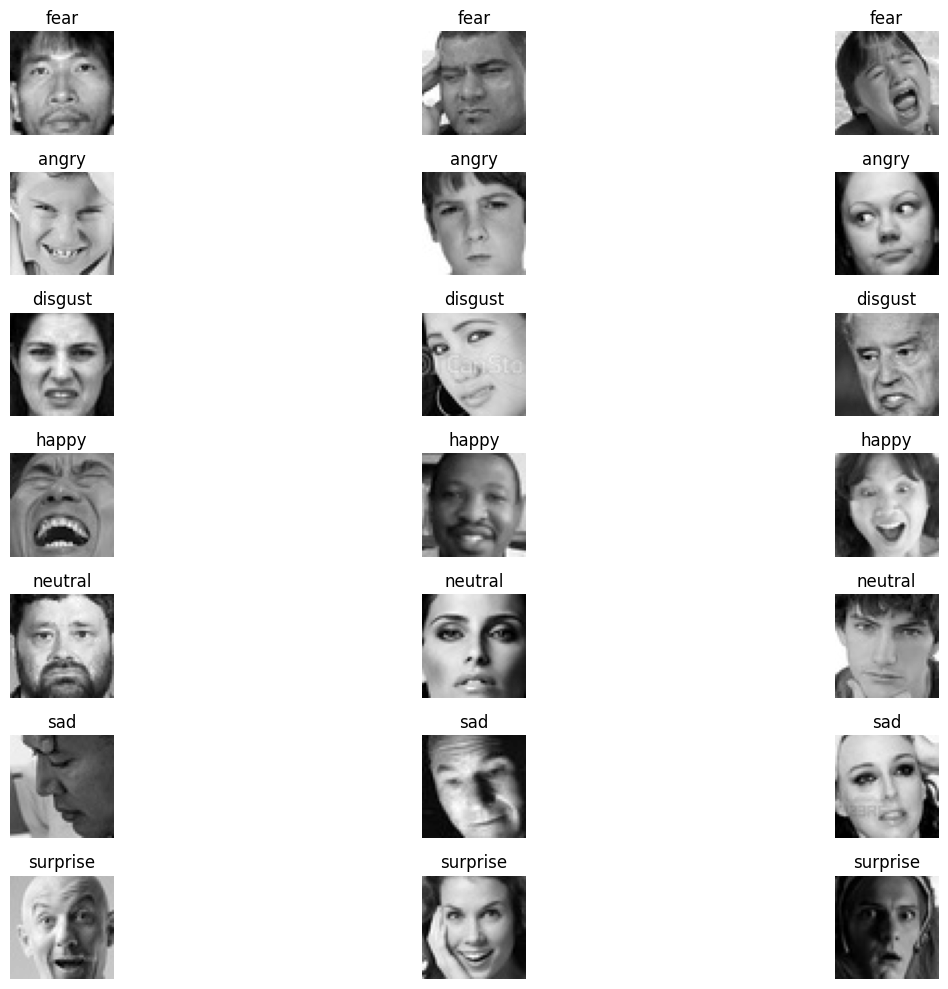

In [ ]:
def plot_images(images_df, num_images=3):
    plt.figure(figsize=(15, 10))
    emotions = images_df['label'].unique()

    for i, emotion in enumerate(emotions):
        emotion_images = images_df[images_df['label'] == emotion].sample(num_images, random_state=42)

        for j in range(num_images):
            plt.subplot(len(emotions), num_images, i * num_images + j + 1)
            plt.imshow(np.array(emotion_images.iloc[j]['pixels']), cmap='gray')
            plt.title(label_to_emotion[emotion_images.iloc[j]['label']])
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Exibe algumas imagens de treinamento
plot_images(df_pixels[df_pixels['conjunto'] == 'treino'])

In [ ]:
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, SeparableConv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, ReLU, Add
from tensorflow.keras.regularizers import l2

# Função para criar um Inverted Residual Block
def InvertedResidualBlock(x, expansion, channels):
    # Expansão
    y = Conv2D(expansion * x.shape[-1], 1, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    y = BatchNormalization()(y)
    y = ReLU(6.)(y)

    # Depthwise convolution
    y = DepthwiseConv2D(3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(y)
    y = BatchNormalization()(y)
    y = ReLU(6.)(y)

    # Projection
    y = Conv2D(channels, 1, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(y)
    y = BatchNormalization()(y)

    # Residual connection
    if y.shape[-1] == x.shape[-1]:
        y = Add()([x, y])

    return y

# Definindo a arquitetura do modelo
def create_model():
    input_img = Input(shape=(48, 48, 1))

    x = Conv2D(32, 3, strides=2, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(input_img)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = SeparableConv2D(32, 3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = InvertedResidualBlock(x, 6, 64)
    x = SeparableConv2D(64, 3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = InvertedResidualBlock(x, 6, 128)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = SeparableConv2D(128, 3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = InvertedResidualBlock(x, 6, 256)
    x = SeparableConv2D(256, 3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = InvertedResidualBlock(x, 6, 256)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = SeparableConv2D(256, 3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = InvertedResidualBlock(x, 6, 512)
    x = SeparableConv2D(512, 3, padding='same', use_bias=False, kernel_regularizer=l2(0.0001))(x)
    x = BatchNormalization()(x)
    x = ReLU(6.)(x)

    x = InvertedResidualBlock(x, 6, 512)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    output = Dense(7, activation='softmax')(x)

    model = Model(inputs=input_img, outputs=output)
    return model

# Separando features e labels
X = np.stack(df_pixels['pixels'].values)
y = df_pixels['label'].values

# One-hot encoding dos labels
y = to_categorical(y)

# Dividindo em conjuntos de treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalizando os dados de pixel
#X_train = X_train.astype('float32') / 255.0
#X_test = X_test.astype('float32') / 255.0
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest',
)

# Criando e compilando o modelo
model = create_model()

# Adam com aprendizado dinâmico e decaimento
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule, amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Treinamento do modelo com data augmentation
model.fit(
    datagen.flow(X_train, y_train, batch_size=16),
    validation_data=(X_test, y_test),
    epochs=80,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)]
)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/80
1796/1796 [==============================] - 98s 42ms/step - loss: 2.2316 - accuracy: 0.2580 - val_loss: 2.1688 - val_accuracy: 0.3190
Epoch 2/80
1796/1796 [==============================] - 71s 40ms/step - loss: 1.8363 - accuracy: 0.3775 - val_loss: 1.6838 - val_accuracy: 0.4309
Epoch 3/80
1796/1796 [==============================] - 68s 38ms/step - loss: 1.6315 - accuracy: 0.4498 - val_loss: 1.5451 - val_accuracy: 0.4740
Epoch 4/80
1796/1796 [==============================] - 69s 38ms/step - loss: 1.5215 - accuracy: 0.4830 - val_loss: 1.5474 - val_accuracy: 0.4758
Epoch 5/80
1796/1796 [==============================] - 70s 39ms/step - loss: 1.4631 - accuracy: 0.5020 - val_loss: 1.4735 - val_accuracy: 0.4999
Epoch 6/80
1796/1796 [==============================] - 68s 38ms/step - loss: 1.4127 - accuracy: 0.5213 - val_loss: 1.5876 - val_accuracy: 0.4754
Epoch 7/80
1796/1796 [==============================] - 67s 37ms/step - loss: 1.3794 - accuracy: 0.5317 - val_loss: 1.3522 -

* batch - 16 | epocas 20 | acuracia `63.23%`
* batch - 16 | epocas 30 | acuracia `64.85%`
* batch - 16 | epocas 40 | acuracia `66.09%`
* batch - 16 | epocas 60 | acuracia `67.37`
* batch - 16 | epocas 80 | acuracia `68.36`

---

* batch - 32 | epocas 20 | acuracia
* batch - 32 | epocas 30 | acuracia
* batch - 32 | epocas 40 | acuracia
* batch - 32 | epocas 60 | acuracia  

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Obtem as previsões do modelo no conjunto de teste
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Avaliação do modelo com métricas
print(classification_report(y_true, y_pred_classes, target_names=label_to_emotion.values()))

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_to_emotion.values(), yticklabels=label_to_emotion.values())
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calcula a matriz de confusão em percentagem
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plota a matriz de confusão em percentagem
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_to_emotion.values(), yticklabels=label_to_emotion.values())
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão (em %)')
plt.show()